In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os


In [6]:
def show_image_bgr(bgr_img, title="Image"):
    rgb = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8,6))
    plt.imshow(rgb)
    plt.axis("off")
    plt.title(title)
    plt.show()


In [7]:
# Loads YOLOv8 small model trained on COCO dataset
model = YOLO("yolov8s.pt")

print("Model Loaded Successfully!")
print("Available Classes:", model.names)


Model Loaded Successfully!
Available Classes: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote',


0: 640x320 5 persons, 201.7ms
Speed: 74.3ms preprocess, 201.7ms inference, 6.3ms postprocess per image at shape (1, 3, 640, 320)


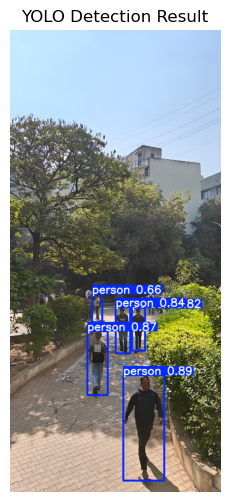

In [8]:
image_path = "Test_Image.jpg"  # change to your image file name

# load image
img = cv2.imread(image_path)

# run detection
results = model(img)
res = results[0]

# draw boxes
output_img = res.plot()

# display result
show_image_bgr(output_img, "YOLO Detection Result")


In [9]:
print("\n=== Detected Objects ===\n")

for box in res.boxes:
    cls_id = int(box.cls[0])
    cls_name = res.names[cls_id]
    conf = float(box.conf[0])
    x1, y1, x2, y2 = box.xyxy[0].tolist()

    print(f"{cls_name}  |  Confidence: {conf:.2f}  |  Box: [{int(x1)}, {int(y1)}, {int(x2)}, {int(y2)}]")



=== Detected Objects ===

person  |  Confidence: 0.89  |  Box: [312, 956, 425, 1248]
person  |  Confidence: 0.87  |  Box: [213, 834, 269, 1011]
person  |  Confidence: 0.84  |  Box: [291, 767, 331, 895]
person  |  Confidence: 0.82  |  Box: [336, 770, 372, 888]
person  |  Confidence: 0.66  |  Box: [226, 731, 254, 809]


In [4]:
# Load pretrained YOLOv8 model
model = YOLO("yolov8n.pt")

# Path to your image
img_path = "Test_Image.jpg"

# Run detection
results = model(img_path)

# Show results
results[0].show()

# Save output image
results[0].save("output.jpg")


image 1/1 C:\Users\RAGHAV ANIL BHISE\Documents\DL Assignments\Object detection using YOLO and Pretrained Model\Test_Image.jpg: 640x320 5 persons, 155.0ms
Speed: 3.8ms preprocess, 155.0ms inference, 7.1ms postprocess per image at shape (1, 3, 640, 320)


'output.jpg'